<a href="https://colab.research.google.com/github/DLesmes/ML_NN_Sk/blob/main/NN_from_Sk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requeriments

In [1]:
import numpy as np
import modin.pandas as pd
#import pandas as pd
import matplotlib.pyplot     as plt
import seaborn  as sns

from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Load Data (Alomarrano)

In [2]:
df = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_full_ok.csv")
id_cli = df['id_registro']
#df = df.drop(['id_registro'], axis=1)
df

,periodo,fecha_nacimiento,edad,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,mora_max,cant_moras_30_ult_12_meses,...,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero,id_registro,anho,mes
0,201908,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201908,2019,8
1,201909,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201909,2019,9
2,201907,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201907,2019,7
3,201903,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201903,2019,3
4,201911,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201911,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,202011,19740415,47,20201010,2.0,10,1,1,0,0,...,SOLTERO,UNIVERSITARIO,OTROS,Empleado,PUERRES,A,F,8596193#202011,2020,11
9527189,202011,19850620,35,20201003,3.0,90,1,1,28,0,...,DIVORCIADO,UNIVERSITARIO,CARRERA MILITAR,Empleado,PEDRAZA,C,M,8616083#202011,2020,11
9527190,202011,19740316,47,20200616,3.0,10,1,1,23,0,...,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,MURILLO,D,M,8670207#202011,2020,11
9527191,202011,19780722,42,20200423,2.0,10,1,1,0,0,...,CASADO,ESPECIALIZACION,ECONOMIA,Empleado,PUERRES,B,F,8677655#202011,2020,11


In [3]:
mejores_variables = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_Variables.csv")
mejores_variables = list(mejores_variables['Selected_variables'])
mejores_variables

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'profesion',
 'nivel_academico',
 'ocupacion',
 'ocupacion_tag_gasto_familiar',
 'estado_civil',
 'rep_calif_cred',
 'genero',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'ciudad_residencia',
 'edad',
 'gasto_familiar']

In [4]:
df = df[mejores_variables]
df

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
0,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201908,0,0.0,8,903000.0,0.0,LORICA,35,2.325260e+05
1,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201909,0,0.0,9,903000.0,0.0,LORICA,35,2.659000e+05
2,1.0,1172612.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201907,0,0.0,7,903000.0,0.0,LORICA,35,2.430520e+05
3,1.0,1172612.0,1282673.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201903,0,0.0,3,2433000.0,0.0,LORICA,35,2.760140e+05
4,1.0,1355032.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,0,201911,0,0.0,11,0.0,0.0,LORICA,35,4.188660e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.0,PUERRES,47,7.431714e+05
9527189,3.0,26913722.0,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.0,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.0,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.0,MURILLO,47,7.853290e+05
9527191,2.0,14481371.0,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.0,PUERRES,42,1.029045e+06


In [5]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [6]:
ind = np.random.randint(1, 9245527, 5500000)

In [7]:
df_std = df.iloc[ind,:]
df_std

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
7803875,1.0,1570000.0,0.0,TRABAJO SOCIAL,UNIVERSITARIO,Empleado,6,CASADO,D,F,...,6,201904,0,0.0,4,1.021300e+07,0.0,GUADALAJARA DE BUGA,38,0.00
3837044,1.0,3391380.0,0.0,OTROS,UNIVERSITARIO,Pensionado,5,DIVORCIADO,A,M,...,3,202010,1,6000000.0,10,0.000000e+00,3091380.0,VALPARAISO,65,102187.00
8099401,2.0,7731198.0,0.0,OTROS,ESPECIALIZACION,Empleado,6,SOLTERO,B,M,...,4,201904,1,11500000.0,4,1.182040e+08,0.0,ARMENIA,31,378101.99
1835837,2.0,9055324.0,0.0,MERCADOTECNIA,TECNOLOGO,Empleado,6,UNION LIBRE,A,M,...,7,202009,0,0.0,9,3.736490e+08,0.0,TOCANCIPA,44,718279.00
7196228,1.0,3385744.0,4732896.0,CONTADURIA,UNIVERSITARIO,Empleado,6,CASADO,A,M,...,2,201903,1,16000000.0,3,0.000000e+00,0.0,GUATAPE,49,222980.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6788171,1.0,4276511.0,0.0,MEDICINA,UNIVERSITARIO,Empleado,6,SOLTERO,H,F,...,2,201905,0,0.0,5,5.949100e+07,0.0,PUERTO RICO,46,1317623.00
5264061,1.0,2000000.0,0.0,INGENIERIA DE SISTEMAS,UNIVERSITARIO,Empleado,6,CASADO,H,M,...,1,201905,0,0.0,5,4.610000e+05,0.0,CUCUNUBA,39,423146.00
7383193,1.0,2656197.0,0.0,ENFERMERIA,TECNOLOGO,Independiente,8,CASADO,H,F,...,0,201905,0,0.0,5,6.338000e+06,0.0,GUASCA,42,598915.00
709794,1.0,4015558.0,2125151.0,OTROS,BACHILLER,Empleado,6,SOLTERO,B,M,...,6,201909,1,9300000.0,9,0.000000e+00,0.0,BUESACO,42,797327.00


## One-Hot Encoding

In [8]:
df_onehot = pd.get_dummies(df_std,
                           columns=features_o)
list(df_onehot.columns)

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'edad',
 'gasto_familiar',
 'profesion_ADMINISTRACION',
 'profesion_AGRONOMIA',
 'profesion_ARQUITECTURA',
 'profesion_ARTES',
 'profesion_AUXILIAR CONTABLE',
 'profesion_AUXILIAR DE ENFERMERIA',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_AZAFATA',
 'profesion_BACTERIOLOGIA',
 'profesion_BIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL',
 'profesion_COMUNICACION SOCIAL',
 'profesion_CONSTRUCCION CIVIL',
 'profesion_CONTADURIA',
 'profesion_DECORADORES Y DISEÑADORES COMERCIALES',
 'pro

In [9]:
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,nivel_academico_tag_gasto_familiar,...,ciudad_residencia_YARIMA,ciudad_residencia_YARUMAL,ciudad_residencia_YONDO,ciudad_residencia_ZAMBRANO,ciudad_residencia_ZAPATOCA,ciudad_residencia_ZARAGOZA,ciudad_residencia_ZARZAL,ciudad_residencia_ZIPACON,ciudad_residencia_ZONA BANANERA,ciudad_residencia_ZU#IGA
7803875,1.0,1570000.0,0.0,6,1,1,3,1,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
3837044,1.0,3391380.0,0.0,5,1,1,8,2,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
8099401,2.0,7731198.0,0.0,6,1,1,7,2,1.0,5.0,...,0,0,0,0,0,0,0,0,0,0
1835837,2.0,9055324.0,0.0,6,1,1,8,2,4.0,1.0,...,0,0,0,0,0,0,0,0,0,0
7196228,1.0,3385744.0,4732896.0,6,1,1,8,2,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6788171,1.0,4276511.0,0.0,6,1,1,1,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
5264061,1.0,2000000.0,0.0,6,1,1,1,2,5.0,3.0,...,0,0,0,0,0,0,0,0,0,0
7383193,1.0,2656197.0,0.0,8,1,1,1,1,5.0,1.0,...,0,0,0,0,0,0,0,0,0,0
709794,1.0,4015558.0,2125151.0,6,1,1,7,2,1.0,4.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
(df_onehot.iloc[:,23] == df_onehot['gasto_familiar']).value_counts()

True    7703810
dtype: int64

## Best Variables

In [11]:
X = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_PCAVariables_centred.csv")
top_PCA_Variables = list(X['Variable'])
top_PCA_Variables[:7]

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar']

In [12]:
top_PCA_Variables = ['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
                     'gasto_familiar']

In [13]:
df_onehot = df_onehot[top_PCA_Variables]
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,gasto_familiar
7803875,1.0,1570000.0,0.0,6,1,1,3,0.00
3837044,1.0,3391380.0,0.0,5,1,1,8,102187.00
8099401,2.0,7731198.0,0.0,6,1,1,7,378101.99
1835837,2.0,9055324.0,0.0,6,1,1,8,718279.00
7196228,1.0,3385744.0,4732896.0,6,1,1,8,222980.00
...,...,...,...,...,...,...,...,...
6788171,1.0,4276511.0,0.0,6,1,1,1,1317623.00
5264061,1.0,2000000.0,0.0,6,1,1,1,423146.00
7383193,1.0,2656197.0,0.0,8,1,1,1,598915.00
709794,1.0,4015558.0,2125151.0,6,1,1,7,797327.00


## Normalization

In [14]:
Estandar = MinMaxScaler()
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

To request implementation, send an email to feature_requests@modin.org.


,count,mean,std,min,25%,50%,75%,max
0,5000000.0,0.30,0.13,0.0,0.20,0.20,0.40,1.0
1,5000000.0,0.01,0.02,0.0,0.01,0.01,0.01,1.0
2,5000000.0,0.00,0.01,0.0,0.00,0.00,0.00,1.0
3,5000000.0,0.53,0.18,0.0,0.56,0.56,0.56,1.0
4,5000000.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
5,5000000.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
6,5000000.0,0.60,0.36,0.0,0.29,0.57,1.00,1.0
7,5000000.0,0.00,0.00,0.0,0.00,0.00,0.00,1.0


In [15]:
x_val = df_std.iloc[-281666:,:-1]
y_val = df_std.iloc[-281666:,-1]
y = df_std.iloc[:-281666,-1]

In [16]:
print(x_val.shape)
print(y_val.shape)
print(y.shape)

(281666, 7)
(281666,)
(4718334,)


## Train_Test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df_std.iloc[:-281666,:-1],
                                                    y,
                                                    test_size=0.30)

X_train

,0,1,2,3,4,5,6
3811524,0.6,0.008978,0.000000,0.555556,0.0,0.0,1.000000
3821996,0.2,0.004149,0.003399,0.555556,0.0,0.0,0.428571
2024605,0.4,0.013791,0.000000,0.555556,0.0,0.0,0.000000
2362010,0.2,0.005384,0.005117,0.000000,0.0,0.0,0.857143
3884826,0.4,0.020872,0.000000,0.555556,0.0,0.0,0.857143
...,...,...,...,...,...,...,...
1608331,0.2,0.006621,0.003680,0.555556,0.0,0.0,1.000000
1288194,0.2,0.003106,0.003981,0.555556,0.0,0.0,0.285714
997635,0.2,0.003351,0.000000,0.555556,0.0,0.0,0.714286
1606743,0.2,0.007245,0.005939,0.777778,0.0,0.0,0.285714


In [18]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)

# Arquitectura

In [19]:
#Definición de la arquitectura
model = Sequential()
model.add(Dense(100, input_dim=7, kernel_initializer='normal',activation='linear'))
model.add(Dense(100, kernel_initializer='normal',activation='linear'))
model.add(Dense(100, kernel_initializer='normal',activation='linear'))
model.add(Dense(100, kernel_initializer='normal',activation='linear'))
model.add(Dense(1, kernel_initializer='normal'))

# Compilación del modelo
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_absolute_percentage_error'])

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


# Entrenamiento y Evaluación del modelo</h1>


# Test 0

In [22]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=1,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


In [23]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

44235/44235 [==============================] - 32s 728us/step - loss: 5.0156e-06 - mean_absolute_percentage_error: 61433.8672s - loss: 5.0409e-06 - mean_absolute_
loss :  5.015551778342342e-06
mean_absolute_percentage_error :  61433.8671875


## Submission

In [24]:
y_hat = model.predict(x_val)
y_hat

array([[0.00089885],
       [0.00184222],
       [0.001015  ],
       ...,
       [0.00080137],
       [0.00093159],
       [0.00604967]], dtype=float32)

In [25]:
y_val

array([0.00047287, 0.00036814, 0.00073648, ..., 0.00083296, 0.00110891,
       0.01323397])

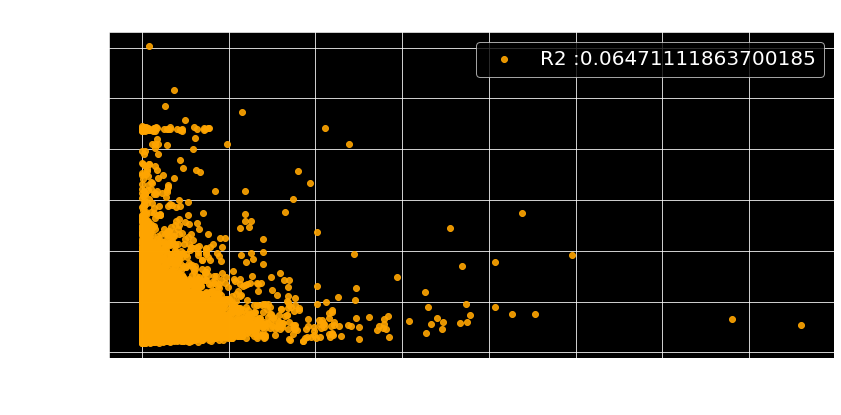

In [26]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 0 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right'
           )
plt.show()

In [27]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.012676,0.000000,0.666667,0.0,0.0,0.285714,0.000899
1,0.8,0.008354,0.000000,0.777778,0.0,0.0,0.142857,0.001842
2,0.2,0.013060,0.011495,0.555556,0.0,0.0,0.571429,0.001015
3,0.4,0.021904,0.000000,0.777778,0.0,0.0,1.000000,0.001491
4,0.2,0.013365,0.010215,0.555556,0.0,0.0,0.857143,0.001032
...,...,...,...,...,...,...,...,...
281661,0.2,0.011342,0.000000,0.555556,0.0,0.0,0.000000,0.000821
281662,0.2,0.005304,0.000000,0.555556,0.0,0.0,0.000000,0.000712
281663,0.2,0.007045,0.000000,0.777778,0.0,0.0,0.000000,0.000801
281664,0.2,0.010650,0.004977,0.555556,0.0,0.0,0.857143,0.000932


In [28]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         6.462851e+05
1         1.324590e+06
2         7.297990e+05
3         1.072216e+06
4         7.423528e+05
              ...     
281661    5.904061e+05
281662    5.118724e+05
281663    5.761994e+05
281664    6.698274e+05
281665    4.349815e+06
Name: 7, Length: 281666, dtype: float64

In [29]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,6.462851e+05
1,12598#201902,1.324590e+06
2,23697#201902,7.297990e+05
3,23768#201902,1.072216e+06
4,7174#201902,7.423528e+05
...,...,...
281661,8596193#202011,5.904061e+05
281662,8616083#202011,5.118724e+05
281663,8670207#202011,5.761994e+05
281664,8677655#202011,6.698274e+05


In [30]:
n = 120
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN110.csv'

In [31]:
np.mean(sub['gasto_familiar'])

778557.0487162914

In [32]:
sub.to_csv(sub_name, index=False)

# Test 1

In [33]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)

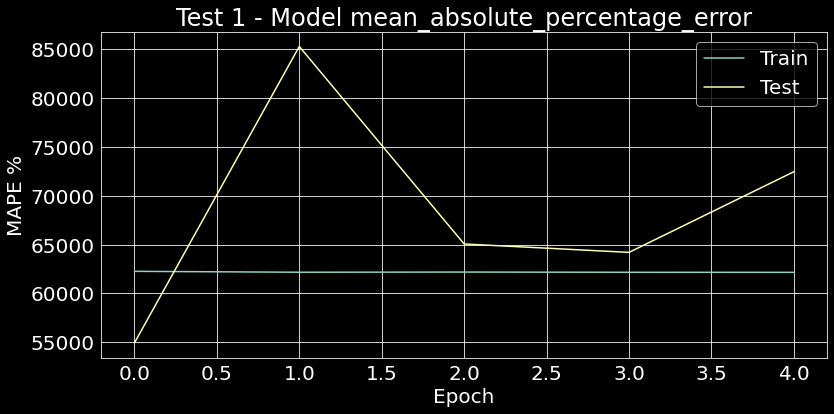

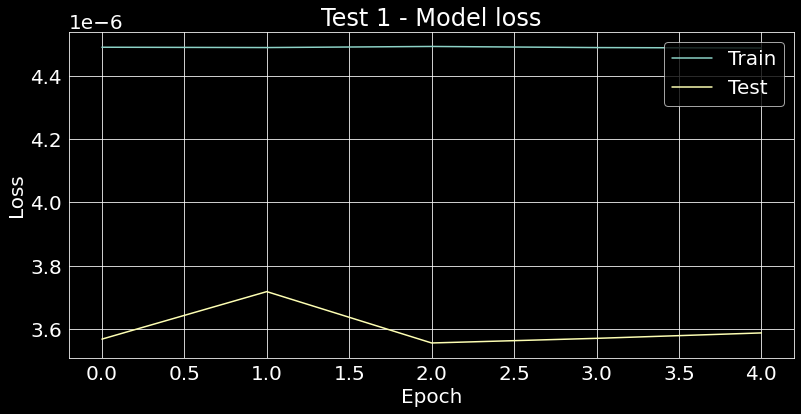

In [34]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 1 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 1 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [35]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

44235/44235 [==============================] - 32s 725us/step - loss: 5.0545e-06 - mean_absolute_percentage_error: 72231.2500
loss :  5.054526809544768e-06
mean_absolute_percentage_error :  72231.25


# Submission

In [36]:
y_hat = model.predict(x_val)
y_hat

array([[0.00110535],
       [0.001951  ],
       [0.0012171 ],
       ...,
       [0.00102098],
       [0.00113551],
       [0.0057267 ]], dtype=float32)

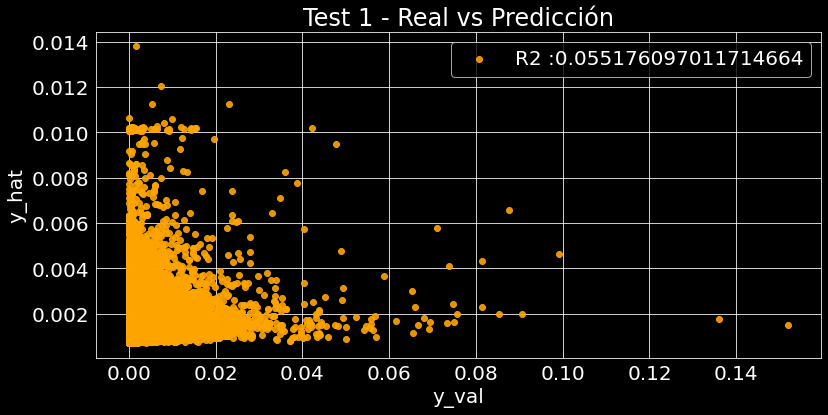

In [37]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 1 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [38]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.012676,0.000000,0.666667,0.0,0.0,0.285714,0.001105
1,0.8,0.008354,0.000000,0.777778,0.0,0.0,0.142857,0.001951
2,0.2,0.013060,0.011495,0.555556,0.0,0.0,0.571429,0.001217
3,0.4,0.021904,0.000000,0.777778,0.0,0.0,1.000000,0.001636
4,0.2,0.013365,0.010215,0.555556,0.0,0.0,0.857143,0.001231
...,...,...,...,...,...,...,...,...
281661,0.2,0.011342,0.000000,0.555556,0.0,0.0,0.000000,0.001034
281662,0.2,0.005304,0.000000,0.555556,0.0,0.0,0.000000,0.000936
281663,0.2,0.007045,0.000000,0.777778,0.0,0.0,0.000000,0.001021
281664,0.2,0.010650,0.004977,0.555556,0.0,0.0,0.857143,0.001136


In [39]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         7.947627e+05
1         1.402804e+06
2         8.751169e+05
3         1.176027e+06
4         8.849357e+05
              ...     
281661    7.436933e+05
281662    6.733145e+05
281663    7.341042e+05
281664    8.164501e+05
281665    4.117594e+06
Name: 7, Length: 281666, dtype: float64

In [40]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,7.947627e+05
1,12598#201902,1.402804e+06
2,23697#201902,8.751169e+05
3,23768#201902,1.176027e+06
4,7174#201902,8.849357e+05
...,...,...
281661,8596193#202011,7.436933e+05
281662,8616083#202011,6.733145e+05
281663,8670207#202011,7.341042e+05
281664,8677655#202011,8.164501e+05


In [41]:
n = 121
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN111.csv'

In [42]:
np.mean(sub['gasto_familiar'])

912701.7257099365

In [43]:
sub.to_csv(sub_name, index=False)

# Test 2

In [44]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


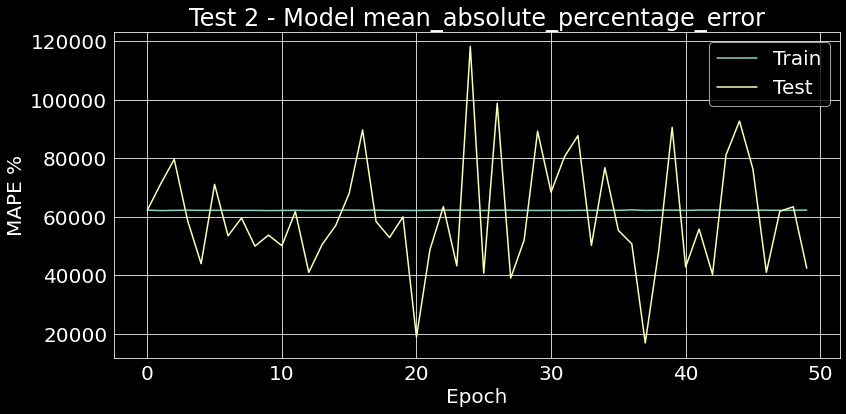

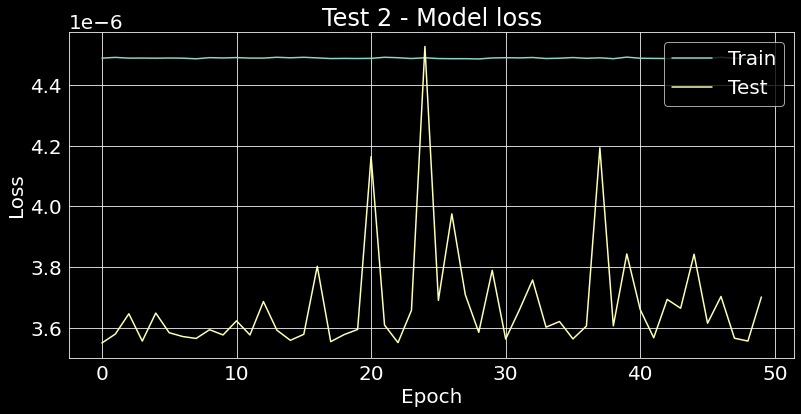

In [45]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 2 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 2 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [46]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

44235/44235 [==============================] - 32s 714us/step - loss: 5.1734e-06 - mean_absolute_percentage_error: 42222.0586
loss :  5.1734314183704555e-06
mean_absolute_percentage_error :  42222.05859375


# Submission

In [47]:
y_hat = model.predict(x_val)
y_hat

array([[0.00063557],
       [0.00123719],
       [0.00070653],
       ...,
       [0.00058634],
       [0.00063653],
       [0.00384913]], dtype=float32)

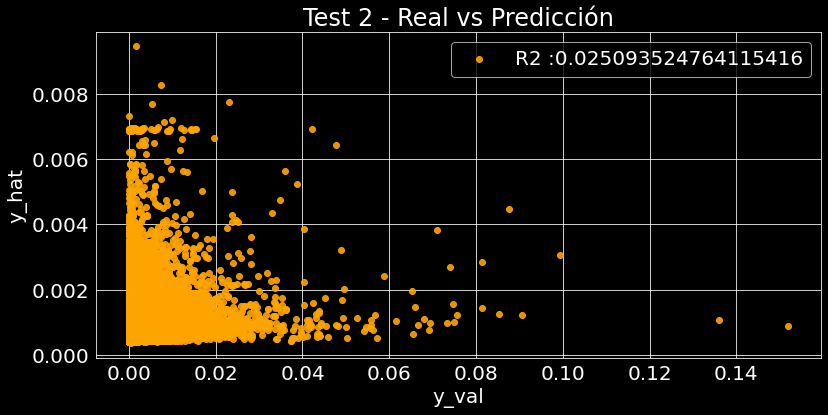

In [48]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 2 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [49]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.012676,0.000000,0.666667,0.0,0.0,0.285714,0.000636
1,0.8,0.008354,0.000000,0.777778,0.0,0.0,0.142857,0.001237
2,0.2,0.013060,0.011495,0.555556,0.0,0.0,0.571429,0.000707
3,0.4,0.021904,0.000000,0.777778,0.0,0.0,1.000000,0.000975
4,0.2,0.013365,0.010215,0.555556,0.0,0.0,0.857143,0.000704
...,...,...,...,...,...,...,...,...
281661,0.2,0.011342,0.000000,0.555556,0.0,0.0,0.000000,0.000601
281662,0.2,0.005304,0.000000,0.555556,0.0,0.0,0.000000,0.000533
281663,0.2,0.007045,0.000000,0.777778,0.0,0.0,0.000000,0.000586
281664,0.2,0.010650,0.004977,0.555556,0.0,0.0,0.857143,0.000637


In [50]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         4.569827e+05
1         8.895630e+05
2         5.080045e+05
3         7.012709e+05
4         5.061035e+05
              ...     
281661    4.318283e+05
281662    3.829791e+05
281663    4.215849e+05
281664    4.576782e+05
281665    2.767588e+06
Name: 7, Length: 281666, dtype: float64

In [51]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,4.569827e+05
1,12598#201902,8.895630e+05
2,23697#201902,5.080045e+05
3,23768#201902,7.012709e+05
4,7174#201902,5.061035e+05
...,...,...
281661,8596193#202011,4.318283e+05
281662,8616083#202011,3.829791e+05
281663,8670207#202011,4.215849e+05
281664,8677655#202011,4.576782e+05


In [52]:
n = 122
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN112.csv'

In [53]:
np.mean(sub['gasto_familiar'])

533521.1256337278

In [54]:
sub.to_csv(sub_name, index=False)

# Test 3

In [55]:
import matplotlib.pyplot as plt

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=75,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


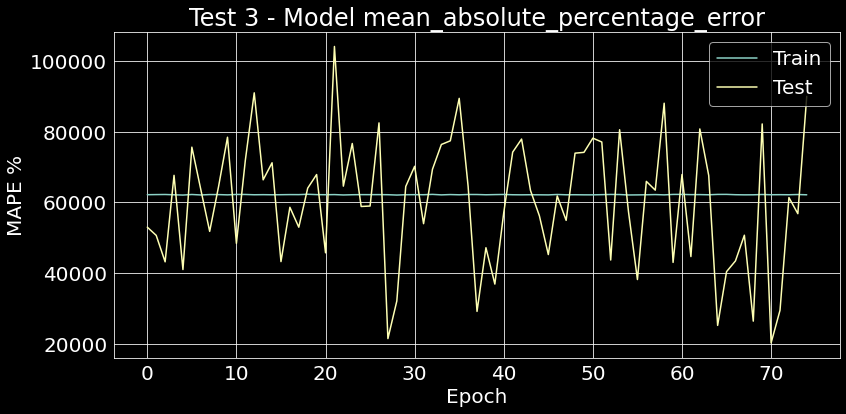

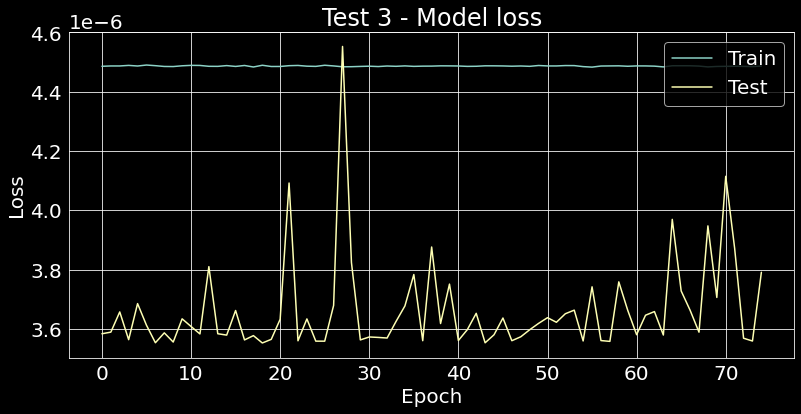

In [56]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 3 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 3 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [57]:
results_h = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_h[i])

44235/44235 [==============================] - 31s 711us/step - loss: 5.2550e-06 - mean_absolute_percentage_error: 89751.3828
loss :  5.2549635256582405e-06
mean_absolute_percentage_error :  89751.3828125


## Submission

In [58]:
y_hat = model.predict(x_val)
y_hat

array([[0.0014109 ],
       [0.0023592 ],
       [0.00152881],
       ...,
       [0.00133293],
       [0.00140205],
       [0.00687234]], dtype=float32)

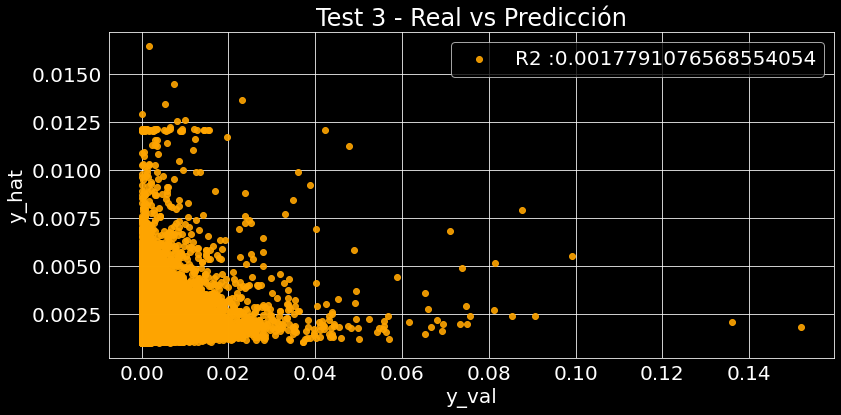

In [59]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 3 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [60]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.012676,0.000000,0.666667,0.0,0.0,0.285714,0.001411
1,0.8,0.008354,0.000000,0.777778,0.0,0.0,0.142857,0.002359
2,0.2,0.013060,0.011495,0.555556,0.0,0.0,0.571429,0.001529
3,0.4,0.021904,0.000000,0.777778,0.0,0.0,1.000000,0.001953
4,0.2,0.013365,0.010215,0.555556,0.0,0.0,0.857143,0.001519
...,...,...,...,...,...,...,...,...
281661,0.2,0.011342,0.000000,0.555556,0.0,0.0,0.000000,0.001355
281662,0.2,0.005304,0.000000,0.555556,0.0,0.0,0.000000,0.001238
281663,0.2,0.007045,0.000000,0.777778,0.0,0.0,0.000000,0.001333
281664,0.2,0.010650,0.004977,0.555556,0.0,0.0,0.857143,0.001402


In [61]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         1.014463e+06
1         1.696304e+06
2         1.099236e+06
3         1.404192e+06
4         1.092046e+06
              ...     
281661    9.740767e+05
281662    8.902673e+05
281663    9.583966e+05
281664    1.008097e+06
281665    4.941327e+06
Name: 7, Length: 281666, dtype: float64

In [62]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,1.014463e+06
1,12598#201902,1.696304e+06
2,23697#201902,1.099236e+06
3,23768#201902,1.404192e+06
4,7174#201902,1.092046e+06
...,...,...
281661,8596193#202011,9.740767e+05
281662,8616083#202011,8.902673e+05
281663,8670207#202011,9.583966e+05
281664,8677655#202011,1.008097e+06


In [63]:
n = 123
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN113.csv'

In [64]:
np.mean(sub['gasto_familiar'])

1130907.8270213865

In [65]:
sub.to_csv(sub_name, index=False)

# Test 4

In [66]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


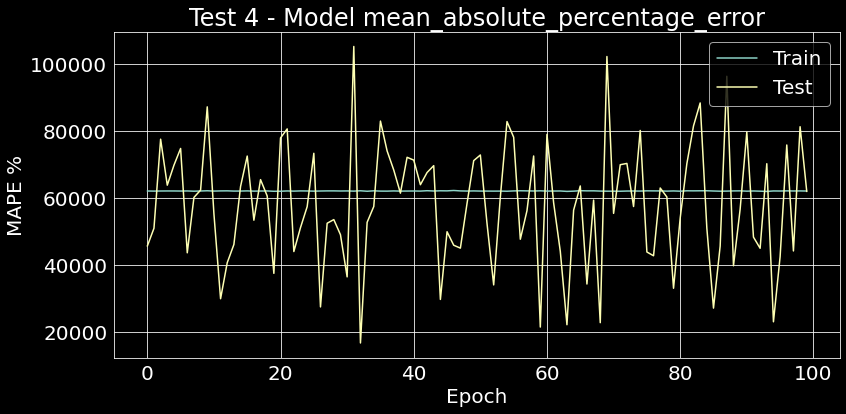

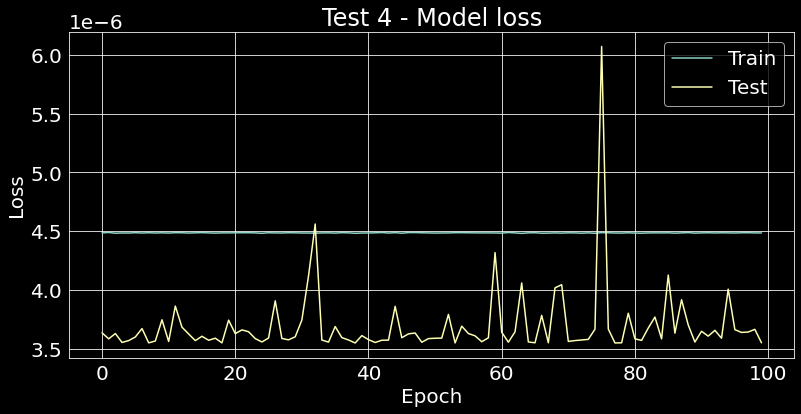

In [67]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 4 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 4 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [68]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

44235/44235 [==============================] - 32s 712us/step - loss: 5.0188e-06 - mean_absolute_percentage_error: 61765.9219
loss :  5.01880822412204e-06
mean_absolute_percentage_error :  61765.921875


## Submission

In [69]:
y_hat = model.predict(x_val)
y_hat

array([[0.00092507],
       [0.00179799],
       [0.00103488],
       ...,
       [0.00084993],
       [0.00092772],
       [0.00562678]], dtype=float32)

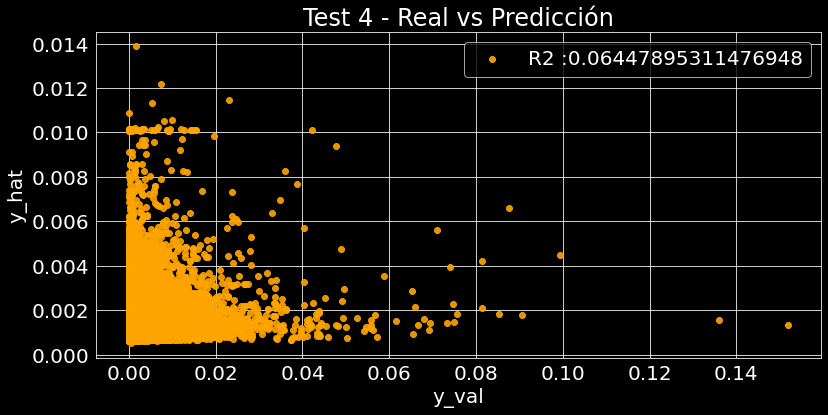

In [70]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 4 - Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [71]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.012676,0.000000,0.666667,0.0,0.0,0.285714,0.000925
1,0.8,0.008354,0.000000,0.777778,0.0,0.0,0.142857,0.001798
2,0.2,0.013060,0.011495,0.555556,0.0,0.0,0.571429,0.001035
3,0.4,0.021904,0.000000,0.777778,0.0,0.0,1.000000,0.001410
4,0.2,0.013365,0.010215,0.555556,0.0,0.0,0.857143,0.001028
...,...,...,...,...,...,...,...,...
281661,0.2,0.011342,0.000000,0.555556,0.0,0.0,0.000000,0.000882
281662,0.2,0.005304,0.000000,0.555556,0.0,0.0,0.000000,0.000782
281663,0.2,0.007045,0.000000,0.777778,0.0,0.0,0.000000,0.000850
281664,0.2,0.010650,0.004977,0.555556,0.0,0.0,0.857143,0.000928


In [72]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         6.651416e+05
1         1.292787e+06
2         7.440934e+05
3         1.013456e+06
4         7.390937e+05
              ...     
281661    6.341730e+05
281662    5.624002e+05
281663    6.111167e+05
281664    6.670457e+05
281665    4.045751e+06
Name: 7, Length: 281666, dtype: float64

In [73]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,6.651416e+05
1,12598#201902,1.292787e+06
2,23697#201902,7.440934e+05
3,23768#201902,1.013456e+06
4,7174#201902,7.390937e+05
...,...,...
281661,8596193#202011,6.341730e+05
281662,8616083#202011,5.624002e+05
281663,8670207#202011,6.111167e+05
281664,8677655#202011,6.670457e+05


In [74]:
n = 124
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN114.csv'

In [75]:
np.mean(sub['gasto_familiar'])

780014.344575082

In [76]:
sub.to_csv(sub_name, index=False)

# Test 5

In [77]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=150,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)



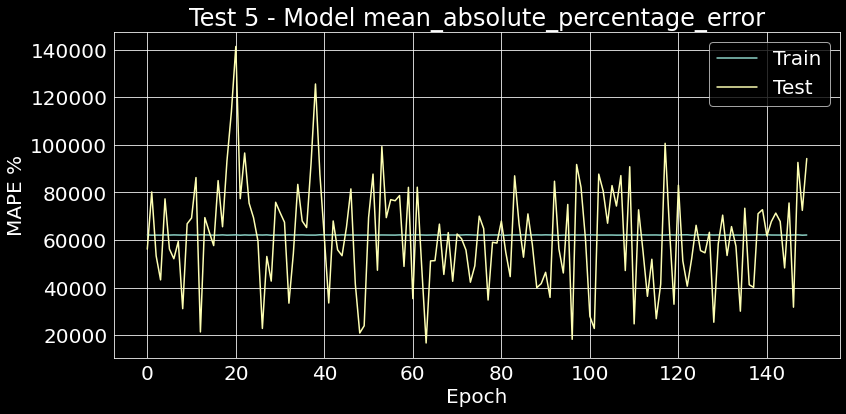

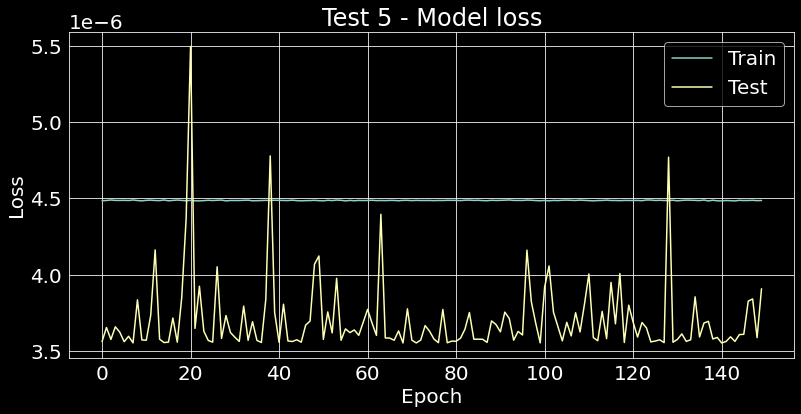

In [78]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 5 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 5 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [79]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

44235/44235 [==============================] - 31s 696us/step - loss: 5.3812e-06 - mean_absolute_percentage_error: 94177.4219
loss :  5.381168648455059e-06
mean_absolute_percentage_error :  94177.421875


# Submission

In [80]:
y_hat = model.predict(x_val)
y_hat

array([[0.0015391 ],
       [0.00208651],
       [0.0016104 ],
       ...,
       [0.00148722],
       [0.00155032],
       [0.00451346]], dtype=float32)

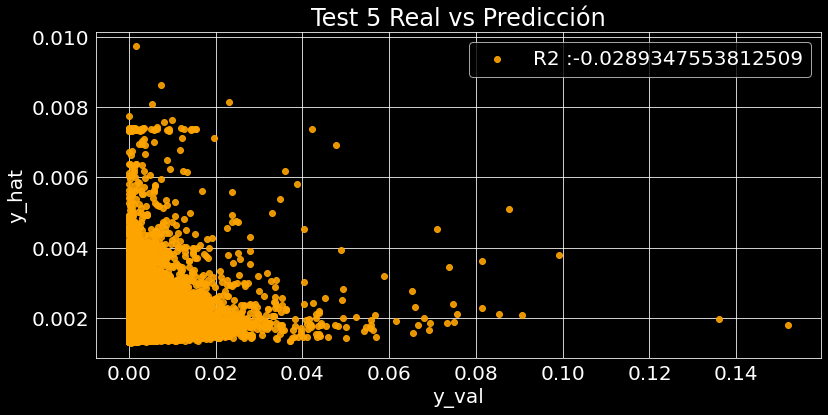

In [81]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'orange',
           alpha=0.9)
plt.title('Test 5 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [82]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[7] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7
0,0.2,0.012676,0.000000,0.666667,0.0,0.0,0.285714,0.001539
1,0.8,0.008354,0.000000,0.777778,0.0,0.0,0.142857,0.002087
2,0.2,0.013060,0.011495,0.555556,0.0,0.0,0.571429,0.001610
3,0.4,0.021904,0.000000,0.777778,0.0,0.0,1.000000,0.001862
4,0.2,0.013365,0.010215,0.555556,0.0,0.0,0.857143,0.001613
...,...,...,...,...,...,...,...,...
281661,0.2,0.011342,0.000000,0.555556,0.0,0.0,0.000000,0.001504
281662,0.2,0.005304,0.000000,0.555556,0.0,0.0,0.000000,0.001441
281663,0.2,0.007045,0.000000,0.777778,0.0,0.0,0.000000,0.001487
281664,0.2,0.010650,0.004977,0.555556,0.0,0.0,0.857143,0.001550


In [83]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         1.106639e+06
1         1.500238e+06
2         1.157904e+06
3         1.338796e+06
4         1.159460e+06
              ...     
281661    1.081146e+06
281662    1.035746e+06
281663    1.069334e+06
281664    1.114709e+06
281665    3.245254e+06
Name: 7, Length: 281666, dtype: float64

In [84]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,1.106639e+06
1,12598#201902,1.500238e+06
2,23697#201902,1.157904e+06
3,23768#201902,1.338796e+06
4,7174#201902,1.159460e+06
...,...,...
281661,8596193#202011,1.081146e+06
281662,8616083#202011,1.035746e+06
281663,8670207#202011,1.069334e+06
281664,8677655#202011,1.114709e+06


In [85]:
n = 125
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN115.csv'

In [86]:
np.mean(sub['gasto_familiar'])

1181669.447832016

In [87]:
sub.to_csv(sub_name, index=False)